In [1]:
import pandas as pd
import numpy as np


In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols


In [3]:
df1 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

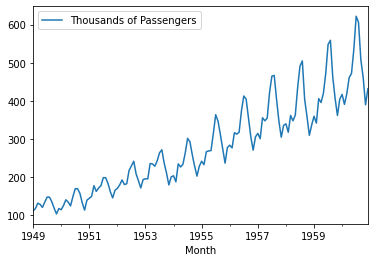

In [5]:
df1.plot()

In [4]:
df2 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\DailyTotalFemaleBirths.csv', index_col=['Date'], parse_dates=True)
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<AxesSubplot:xlabel='Date'>

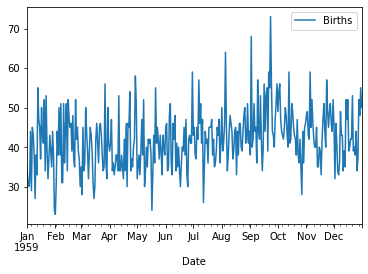

In [6]:
df2.plot()

In [7]:
import warnings
warnings.filterwarnings('ignore')

Let's first create a simple dataframe and calculate the <tt>autocorrelation</tt> and <tt>partial-autocorrelation</tt> of it of it. 

In [10]:
df = pd.DataFrame({'a' : [13,5,11,12,9]})
df.head()

,a
0,13
1,5
2,11
3,12
4,9


In [11]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

PACF using <tt>Yule-Walker</tt> equation

In [13]:
pacf_yw(df['a'], nlags=4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

PACF using <tt>Ordinary Least Square</tt> equation

In [14]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

Plotting the <tt>ACF</tt> and <tt>PACF</tt> for Actual Dataset

In [15]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

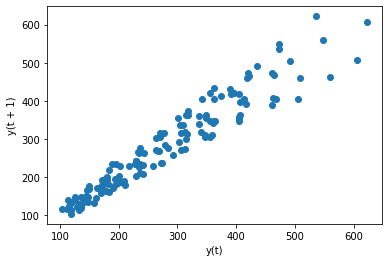

In [16]:
lag_plot(df1['Thousands of Passengers'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

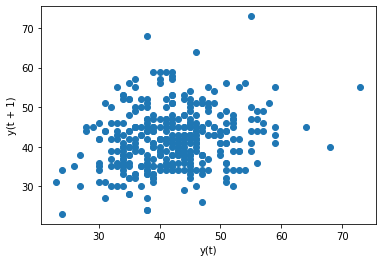

In [17]:
lag_plot(df2['Births'])

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Plotting Non-Stationary dataset**

<AxesSubplot:xlabel='Month'>

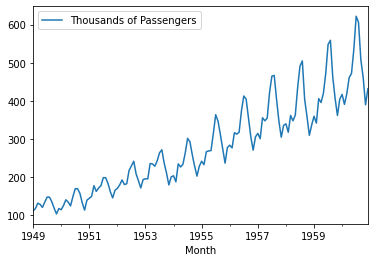

In [24]:
df1.plot()

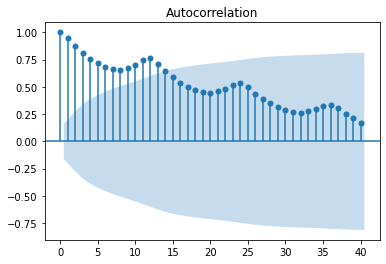

In [26]:
plot_acf(df1['Thousands of Passengers'], lags=40);

Here in the plot, we see that there is a high correlation between the entries and the lags. That means the value at time <tt>t</tt> is highly dependent of the value at its previous timestep.

**Plotting Stationary dataset**

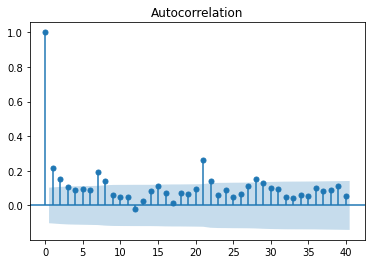

In [27]:
plot_acf(df2['Births'], lags=40);

Here in the plot, we see that there is no or very minimal correlation between the entries and the lags. That means the value at time <tt>t</tt> is not dependent on the value at its previous timestep. And obviously, the female birth today is not at all related to number of female births yesterday and so on.

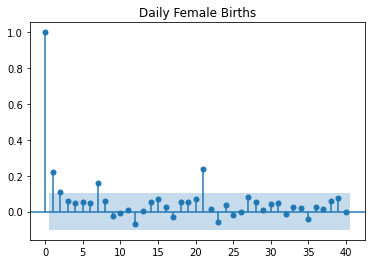

In [29]:
plot_pacf(df2['Births'], lags=40, title="Daily Female Births");